In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai import *
from fastai.vision import *

# Dogs and cats

## rn34

In [3]:
data = image_data_from_folder(Path('../../data/dogscats'), 
    ds_tfms=get_transforms(), tfms=imagenet_norm, size=224)

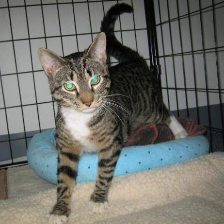

In [4]:
data.valid_ds[1][0]

In [5]:
learn = ConvLearner(data, tvm.resnet34, metrics=accuracy)

In [6]:
learn.fit_one_cycle(1)

Total time: 01:35
epoch  train loss  valid loss  accuracy
0      0.053561    0.021720    0.992000  (01:35)



In [7]:
learn.save('rn34')

In [8]:
learn.load('rn34')

In [9]:
lr2=3e-4
learn.unfreeze()
learn.fit_one_cycle(6, slice(lr2/25,lr2), pct_start=0.05)

Total time: 09:08
epoch  train loss  valid loss  accuracy
0      0.046992    0.020737    0.990000  (01:31)
1      0.031428    0.025321    0.990000  (01:31)
2      0.018473    0.017969    0.993500  (01:30)
3      0.011807    0.016432    0.994500  (01:31)
4      0.007964    0.014988    0.994500  (01:31)
5      0.005246    0.015823    0.995500  (01:31)



In [10]:
learn.save('rn34.2')

In [11]:
accuracy(*learn.TTA())

Total time: 01:03



tensor(0.9960)

## rn50

In [ ]:
learn = ConvLearner(data, tvm.resnet50, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(6)

In [ ]:
lr2=3e-4
learn.unfreeze()
learn.fit_one_cycle(6, slice(lr2/25,lr2), pct_start=0.05)

In [ ]:
learn.save('rn50')

In [ ]:
accuracy(*learn.TTA())

## Fin

In [ ]:
data = data_from_imagefolder(Path('data/dogscats'),
    ds_tfms=get_transforms(), tfms=imagenet_norm, size=224)
learn = ConvLearner(data, tvm.resnet34, metrics=accuracy)
learn.fit_one_cycle(6)
learn.unfreeze()
learn.fit_one_cycle(4, slice(1e-5,3e-4))

In [ ]:
accuracy(*learn.TTA())